In [0]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gzip
import seaborn as sns
sns.set()

from google.colab import drive
drive.mount('/content/drive')

root='drive/My Drive/machine learning/counter.gz'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Importing the dataset
df=pd.read_csv(root,compression='gzip',parse_dates=['stime'],index_col='stime')

In [0]:
# Save original data set, just in case
df_original=df.copy()

In [0]:
# Check no. of rows and columns
df.shape

(1603290, 133)

In [0]:
# Check first 5 rows
df.head()

,collint,item,node,nRecs,rops,site,ENodeBFunction,EUtranCellFDD,ManagedElement,neighbors,numHOs,pmactiveuedlsum,pmactiveueulsum,pmBadCovEvalReport,pmBadCovSearchEvalReport,pmCellCceUtilization,pmCellDowntimeAuto,pmCellDowntimeMan,pmErabEstabAttInit,pmErabEstabFailAddedLic,pmErabEstabFailGbrDlEnb,pmErabEstabFailGbrUlEnb,pmErabEstabSuccInit,pmErabQciLevSum$1,pmErabRelAbnormalEnbActCdt,pmErabRelAbnormalEnbActHo,pmErabRelAbnormalEnbActTnFail,pmErabRelAbnormalEnbActUeLost,pmHoPrepRejInBearerAdmissionRej,pmHoPrepRejInCellIntensDLC,pmHoPrepRejInCellIntensStat,pmHoPrepRejInCellLatency,pmHoPrepRejInDlOnlyCell,pmHoPrepRejInDuIntens,pmHoPrepRejInLicConnUsers,pmHoPrepRejInLicMob,pmHoPrepRejInLicMultiErab,pmHoPrepRejInLicRlcUm,pmHoPrepRejInMISigQCong,pmHoPrepRejInMpOverload,...,pmRaSuccCfra,pmRlcArqDlAck,pmRlcArqDlNack,pmRrcConnEstabAtt,pmRrcConnEstabAttReatt,pmRrcConnEstabFailBearerAdmissionRej,pmRrcConnEstabFailCellIntensDLC,pmRrcConnEstabFailCellIntensStat,pmRrcConnEstabFailCellIntensSwC,pmRrcConnEstabFailCellLatency,pmRrcConnEstabFailDuIntens,pmRrcConnEstabFailDuSwC,pmRrcConnEstabFailDynUeAdmCtrl,pmRrcConnEstabFailFailureInRadioProcedure,pmRrcConnEstabFailLic,pmrrcconnestabfaillicactiveusers,pmrrcconnestabfaillowcovuelic,pmrrcconnestabfailmisigqcong,pmrrcconnestabfailmmeovlmod,pmrrcconnestabfailmmeovlmos,pmRrcConnEstabFailMpOverload,pmRrcConnEstabSucc,pmRrcConnLevSum,pmrrcconnmax,pmRrcConnReestFailLicMtReest,pmS1SigConnEstabAtt,pmS1SigConnEstabFailMmeOvlMos,pmS1SigConnEstabSucc,pmSchedActivityCellDl,pmSchedActivityCellUl,pmSchedActivityUeDl,pmSchedActivityUeUl,pmUeCtxtEstabAtt,pmUeCtxtEstabSucc,pmUeCtxtFetchAtt,pmUeCtxtFetchSucc,pmUeThpTimeDl,pmUeThpTimeUl,pmUeThpVolUl,pmulpathlossdistr
stime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-14 01:00:00,15,LD13481K,LD13481,4,4,LD13481,1,LD13481K,LD13481,NaN,NaN,1286893.0,617549.0,0.0,19.0,NaN,0.0,0.0,616.0,0.0,0.0,0.0,616.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,110.0,1084243.0,825.0,411.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,411.0,3765.0,38.0,0.0,411.0,0.0,411.0,965446.0,387648.0,1119782.0,629226.0,371.0,371.0,21.0,20.0,939540.0,71238.0,30760.0,NaN
2019-04-14 02:00:00,15,LD13481K,LD13481,4,4,LD13481,1,LD13481K,LD13481,NaN,NaN,224444.0,112565.0,0.0,16.0,NaN,0.0,0.0,860.0,0.0,0.0,0.0,860.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0,84454.0,32.0,543.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,543.0,2579.0,31.0,0.0,543.0,0.0,543.0,214132.0,139540.0,229942.0,273707.0,499.0,499.0,11.0,10.0,46992.0,6939.0,6331.0,NaN
2019-04-14 03:00:00,15,LD13481K,LD13481,4,4,LD13481,1,LD13481K,LD13481,NaN,NaN,30512.0,38573.0,0.0,17.0,NaN,0.0,0.0,977.0,0.0,0.0,0.0,977.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.0,25952.0,36.0,576.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,576.0,1738.0,31.0,0.0,576.0,0.0,576.0,32514.0,35710.0,44469.0,98410.0,544.0,544.0,11.0,10.0,13819.0,10883.0,2936.0,NaN
2019-04-14 04:00:00,15,LD13481K,LD13481,4,4,LD13481,1,LD13481K,LD13481,NaN,NaN,55769.0,64309.0,0.0,5.0,NaN,0.0,0.0,899.0,0.0,0.0,0.0,899.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.0,53060.0,94.0,521.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,521.0,1865.0,31.0,0.0,521.0,0.0,521.0,58111.0,43766.0,70237.0,140571.0,497.0,497.0,19.0,15.0,30787.0,4313.0,4991.0,NaN
2019-04-14 05:00:00,15,LD13481K,LD13481,4,4,LD13481,1,LD13481K,LD13481,NaN,NaN,308395.0,246140.0,0.0,63.0,NaN,0.0,0.0,1662.0,0.0,0.0,0.0,1662.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,253885.0,246.0,967.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,966.0,3368.0,43.0,0.0,966.0,0.0,966.0,282611.0,167704.0,300582.0,485297.0,925.0,925.0,39.0,34.0,223788.0,53443.0,19060.0,NaN


In [0]:
# Select the features which are resposible to Congestion, UL and DL Radio quality, UL and DL volume of data
df=df[["item","pmBadCovEvalReport","pmBadCovSearchEvalReport","pmCellCceUtilization","pmErabEstabFailAddedLic","pmErabRelAbnormalEnbActUeLost","pmHoPrepRejInCellIntensDLC","pmHoPrepRejInLicConnUsers","pmHoPrepRejInLicMultiErab","pmHoPrepRejInMISigQCong","pmLicConnectedUsersMax","pmMacHarqDlAck16qam","pmMacHarqDlAck256qam","pmMacHarqDlAck64qam","pmPdcpPktDiscDlPelr","pmPdcpPktDiscDlPelrUu","pmPdcpPktLostUl","pmPdcpVolDlDrb","pmPdcpVolDlSrb","pmPdcpVolUlDrb","pmPdcpVolUlSrb","pmprbavaildl","pmprbavailul","pmprbavailulpucchcqi","pmprbavailulpucchsr","pmprbuseddlbcch","pmprbuseddldtch","pmprbuseddlpcch","pmprbuseddlsamp","pmprbuseddlsum","pmRadioTbsPwrRestricted","pmRlcArqDlNack","pmRrcConnEstabFailBearerAdmissionRej","pmRrcConnEstabFailDynUeAdmCtrl","pmRrcConnEstabFailLic","pmrrcconnestabfaillicactiveusers","pmrrcconnestabfaillowcovuelic","pmrrcconnestabfailmisigqcong","pmrrcconnestabfailmmeovlmod","pmrrcconnestabfailmmeovlmos","pmRrcConnEstabFailMpOverload","pmrrcconnmax","pmS1SigConnEstabFailMmeOvlMos","pmUeThpTimeUl"]]

In [0]:
# Check no. of rows and columns
df.shape

(1603290, 44)

In [0]:
# Check first 5 rows
df.head()

,item,pmBadCovEvalReport,pmBadCovSearchEvalReport,pmCellCceUtilization,pmErabEstabFailAddedLic,pmErabRelAbnormalEnbActUeLost,pmHoPrepRejInCellIntensDLC,pmHoPrepRejInLicConnUsers,pmHoPrepRejInLicMultiErab,pmHoPrepRejInMISigQCong,pmLicConnectedUsersMax,pmMacHarqDlAck16qam,pmMacHarqDlAck256qam,pmMacHarqDlAck64qam,pmPdcpPktDiscDlPelr,pmPdcpPktDiscDlPelrUu,pmPdcpPktLostUl,pmPdcpVolDlDrb,pmPdcpVolDlSrb,pmPdcpVolUlDrb,pmPdcpVolUlSrb,pmprbavaildl,pmprbavailul,pmprbavailulpucchcqi,pmprbavailulpucchsr,pmprbuseddlbcch,pmprbuseddldtch,pmprbuseddlpcch,pmprbuseddlsamp,pmprbuseddlsum,pmRadioTbsPwrRestricted,pmRlcArqDlNack,pmRrcConnEstabFailBearerAdmissionRej,pmRrcConnEstabFailDynUeAdmCtrl,pmRrcConnEstabFailLic,pmrrcconnestabfaillicactiveusers,pmrrcconnestabfaillowcovuelic,pmrrcconnestabfailmisigqcong,pmrrcconnestabfailmmeovlmod,pmrrcconnestabfailmmeovlmos,pmRrcConnEstabFailMpOverload,pmrrcconnmax,pmS1SigConnEstabFailMmeOvlMos,pmUeThpTimeUl
stime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-14 01:00:00,LD13481K,0.0,19.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,469939.0,4245.0,386481.0,0.0,66.0,42.0,6562970.0,614.0,256225.0,724.0,90000000.0,90000000.0,NaN,NaN,2165389.0,20670739.0,661682.0,NaN,NaN,323574.0,825.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,71238.0
2019-04-14 02:00:00,LD13481K,0.0,16.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,33004.0,7407.0,39613.0,0.0,21.0,23.0,595752.0,590.0,160405.0,711.0,90000000.0,90000000.0,NaN,NaN,2150717.0,2629669.0,581758.0,NaN,NaN,94055.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,6939.0
2019-04-14 03:00:00,LD13481K,0.0,17.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6189.0,0.0,6908.0,0.0,37.0,51.0,117371.0,495.0,17060.0,671.0,90000000.0,90000000.0,NaN,NaN,2149765.0,527384.0,550225.0,NaN,NaN,47899.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,10883.0
2019-04-14 04:00:00,LD13481K,0.0,5.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,11642.0,3269.0,28293.0,0.0,123.0,47.0,414449.0,402.0,30580.0,654.0,90000000.0,90000000.0,NaN,NaN,2149898.0,942633.0,555175.0,NaN,NaN,35816.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,4313.0
2019-04-14 05:00:00,LD13481K,0.0,63.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,NaN,93739.0,8349.0,54582.0,0.0,78.0,112.0,1243464.0,826.0,96324.0,1059.0,90000000.0,90000000.0,NaN,NaN,2160529.0,5629246.0,631827.0,NaN,NaN,103604.0,246.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,53443.0


In [0]:
# Information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1603290 entries, 2019-04-14 01:00:00 to 2019-04-14 05:00:00
Data columns (total 44 columns):
item                                    1603290 non-null object
pmBadCovEvalReport                      1599573 non-null float64
pmBadCovSearchEvalReport                1599573 non-null float64
pmCellCceUtilization                    0 non-null float64
pmErabEstabFailAddedLic                 1603252 non-null float64
pmErabRelAbnormalEnbActUeLost           1599573 non-null float64
pmHoPrepRejInCellIntensDLC              1599573 non-null float64
pmHoPrepRejInLicConnUsers               1603252 non-null float64
pmHoPrepRejInLicMultiErab               1599573 non-null float64
pmHoPrepRejInMISigQCong                 1599573 non-null float64
pmLicConnectedUsersMax                  0 non-null float64
pmMacHarqDlAck16qam                     1599573 non-null float64
pmMacHarqDlAck256qam                    1599573 non-null float64
pmMacHarqDlAck64qam   

In [0]:
# Descriptive/Summary statistics
df.describe()

,pmBadCovEvalReport,pmBadCovSearchEvalReport,pmCellCceUtilization,pmErabEstabFailAddedLic,pmErabRelAbnormalEnbActUeLost,pmHoPrepRejInCellIntensDLC,pmHoPrepRejInLicConnUsers,pmHoPrepRejInLicMultiErab,pmHoPrepRejInMISigQCong,pmLicConnectedUsersMax,pmMacHarqDlAck16qam,pmMacHarqDlAck256qam,pmMacHarqDlAck64qam,pmPdcpPktDiscDlPelr,pmPdcpPktDiscDlPelrUu,pmPdcpPktLostUl,pmPdcpVolDlDrb,pmPdcpVolDlSrb,pmPdcpVolUlDrb,pmPdcpVolUlSrb,pmprbavaildl,pmprbavailul,pmprbavailulpucchcqi,pmprbavailulpucchsr,pmprbuseddlbcch,pmprbuseddldtch,pmprbuseddlpcch,pmprbuseddlsamp,pmprbuseddlsum,pmRadioTbsPwrRestricted,pmRlcArqDlNack,pmRrcConnEstabFailBearerAdmissionRej,pmRrcConnEstabFailDynUeAdmCtrl,pmRrcConnEstabFailLic,pmrrcconnestabfaillicactiveusers,pmrrcconnestabfaillowcovuelic,pmrrcconnestabfailmisigqcong,pmrrcconnestabfailmmeovlmod,pmrrcconnestabfailmmeovlmos,pmRrcConnEstabFailMpOverload,pmrrcconnmax,pmS1SigConnEstabFailMmeOvlMos,pmUeThpTimeUl
count,1599573.0,1.599573e+06,0.0,1603252.0,1.599573e+06,1.599573e+06,1603252.0,1599573.0,1599573.0,0.0,1.599573e+06,1.599573e+06,1.599573e+06,1.603252e+06,1.603252e+06,1.603252e+06,1.603252e+06,1.603252e+06,1.603252e+06,1.603252e+06,1.599573e+06,1.599573e+06,0.0,0.0,1.599573e+06,1.599573e+06,1.599573e+06,504.0,504.000000,1.599573e+06,1.599573e+06,1599573.0,1.599573e+06,1603252.0,1603252.0,1.597653e+06,1.599573e+06,1603252.0,1603252.0,1599573.0,1.599573e+06,1603252.0,1.603252e+06
mean,0.0,2.059221e+02,NaN,0.0,7.742300e+00,2.698845e-03,0.0,0.0,0.0,NaN,6.762133e+05,5.644364e+03,5.707922e+05,8.417441e+00,1.598448e+03,5.042982e+03,1.372357e+07,2.826845e+03,1.113547e+06,2.852827e+03,1.553551e+08,6.303579e+07,NaN,NaN,2.374163e+06,5.282987e+07,1.300787e+06,3600.0,41745.303571,8.791219e+05,5.412245e+03,0.0,1.531721e-01,0.0,0.0,8.136936e-06,4.126101e-05,0.0,0.0,0.0,1.007057e+02,0.0,2.435487e+06
std,0.0,2.752491e+02,NaN,0.0,5.519659e+01,1.033487e+00,0.0,0.0,0.0,NaN,8.147846e+05,2.527331e+04,8.512358e+05,4.446252e+02,1.667729e+04,1.648738e+04,1.794388e+07,3.360570e+03,1.372424e+06,4.978742e+03,9.135894e+07,2.603734e+07,NaN,NaN,6.937336e+05,6.417344e+07,7.397702e+05,0.0,47470.812128,1.220973e+06,9.601333e+03,0.0,6.733206e+01,0.0,0.0,3.448534e-03,1.235067e-02,0.0,0.0,0.0,9.845823e+01,0.0,8.164741e+06
min,0.0,0.000000e+00,NaN,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,3600.0,1.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00
25%,0.0,2.900000e+01,NaN,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,6.245000e+04,0.000000e+00,3.980900e+04,0.000000e+00,4.300000e+01,7.100000e+01,1.297580e+06,5.300000e+02,1.279630e+05,5.650000e+02,9.000000e+07,3.600000e+07,NaN,NaN,2.123603e+06,5.840453e+06,6.427000e+05,3600.0,6602.000000,9.602700e+04,3.690000e+02,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,2.900000e+01,0.0,9.093475e+04
50%,0.0,1.160000e+02,NaN,0.0,3.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,3.380170e+05,5.900000e+01,2.220160e+05,0.000000e+00,2.640000e+02,8.200000e+02,6.445653e+06,1.820000e+03,6.184550e+05,1.994000e+03,1.440000e+08,7.200000e+07,NaN,NaN,2.298112e+06,2.733363e+07,1.333374e+06,3600.0,24275.000000,4.196420e+05,2.170000e+03,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,7.200000e+01,0.0,6.116905e+05
75%,0.0,2.810000e+02,NaN,0.0,8.000000e+00,0.000000e+00,0.0,0.0,0.0,NaN,1.009494e+06,1.893000e+03,7.290100e+05,0.000000e+00,8.110000e+02,3.990000e+03,1.906901e+07,3.935000e+03,1.604841e+06,4.252000e+03,2.880000e+08,9.000000e+07,NaN,NaN,2.869930e+06,7.532409e+07,1.881779e+06,3600.0,63629.000000,1.131506e+06,6.980000e+03,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,1.440000e+02,0.0,2.211629e+06
max,0.0,1.449000e+04,NaN,0.0,1.869600e+04,6.550000e+02,0.0,0.0,0.0,NaN,5.242724e+06,3.465294e+06,9.290170e+06,3

In [0]:
# Checking for missing values
df.isnull().sum().sort_values(ascending=False)

pmLicConnectedUsersMax                  1603290
pmCellCceUtilization                    1603290
pmprbavailulpucchcqi                    1603290
pmprbavailulpucchsr                     1603290
pmprbuseddlsamp                         1602786
pmprbuseddlsum                          1602786
pmrrcconnestabfaillowcovuelic              5637
pmprbuseddlpcch                            3717
pmMacHarqDlAck16qam                        3717
pmHoPrepRejInMISigQCong                    3717
pmHoPrepRejInLicMultiErab                  3717
pmHoPrepRejInCellIntensDLC                 3717
pmErabRelAbnormalEnbActUeLost              3717
pmprbavailul                               3717
pmprbuseddlbcch                            3717
pmprbuseddldtch                            3717
pmprbavaildl                               3717
pmMacHarqDlAck64qam                        3717
pmRadioTbsPwrRestricted                    3717
pmRlcArqDlNack                             3717
pmRrcConnEstabFailBearerAdmissionRej    

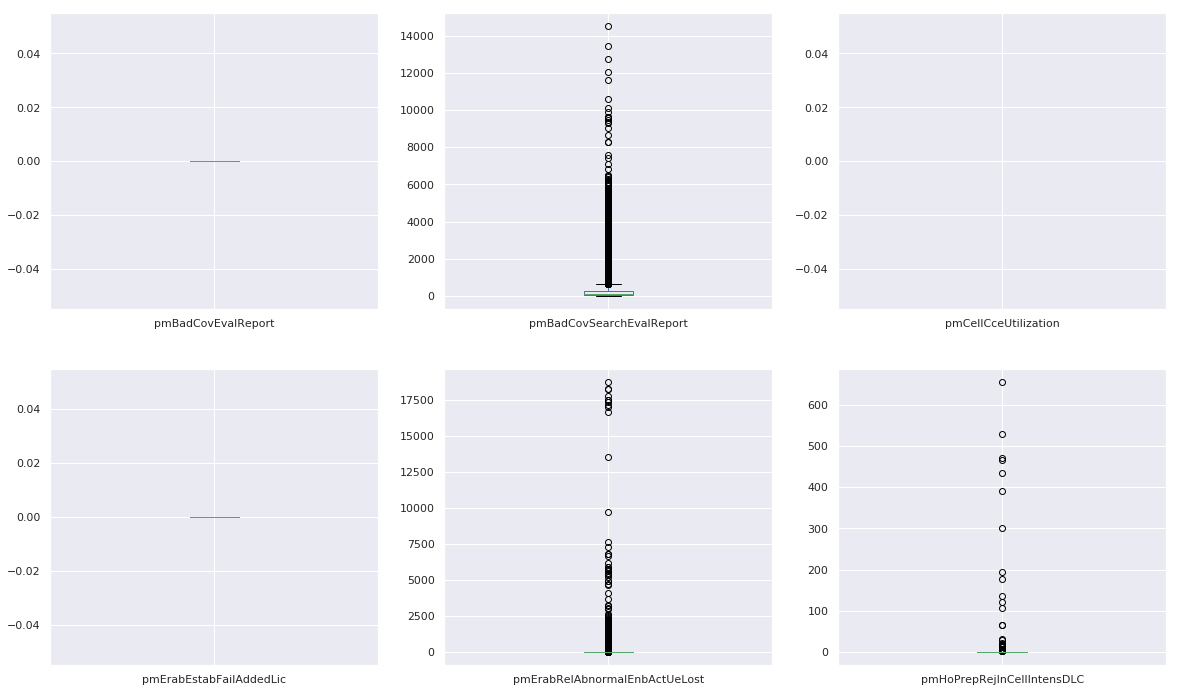

<Figure size 432x288 with 0 Axes>

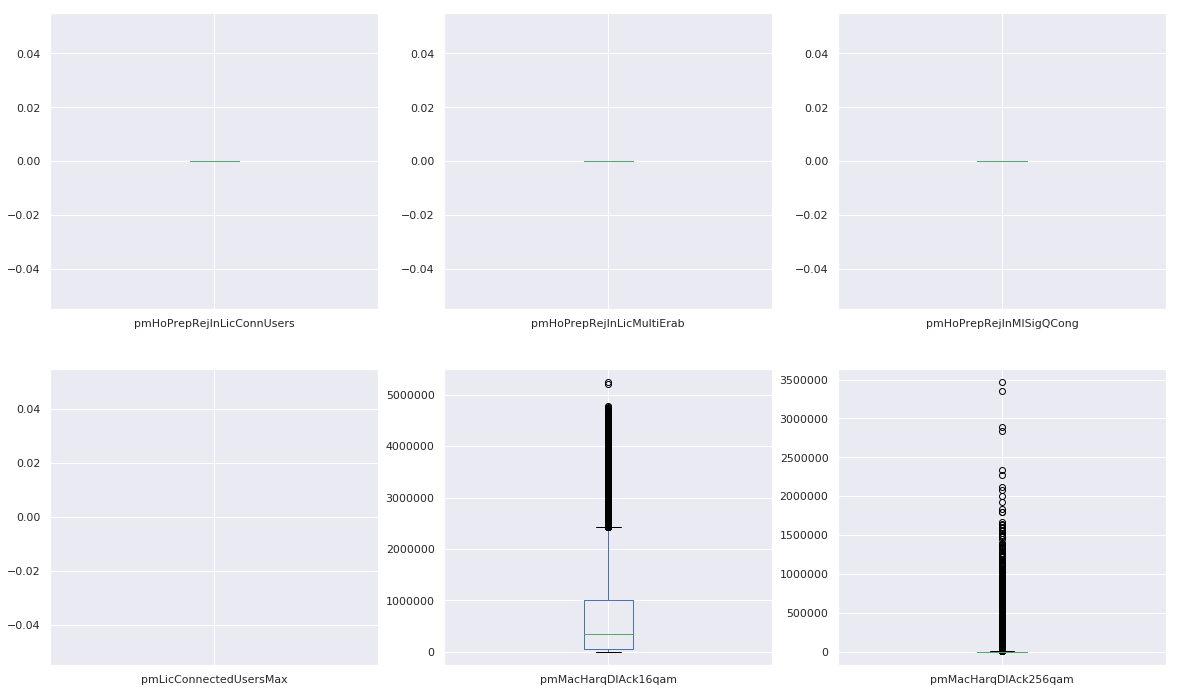

<Figure size 432x288 with 0 Axes>

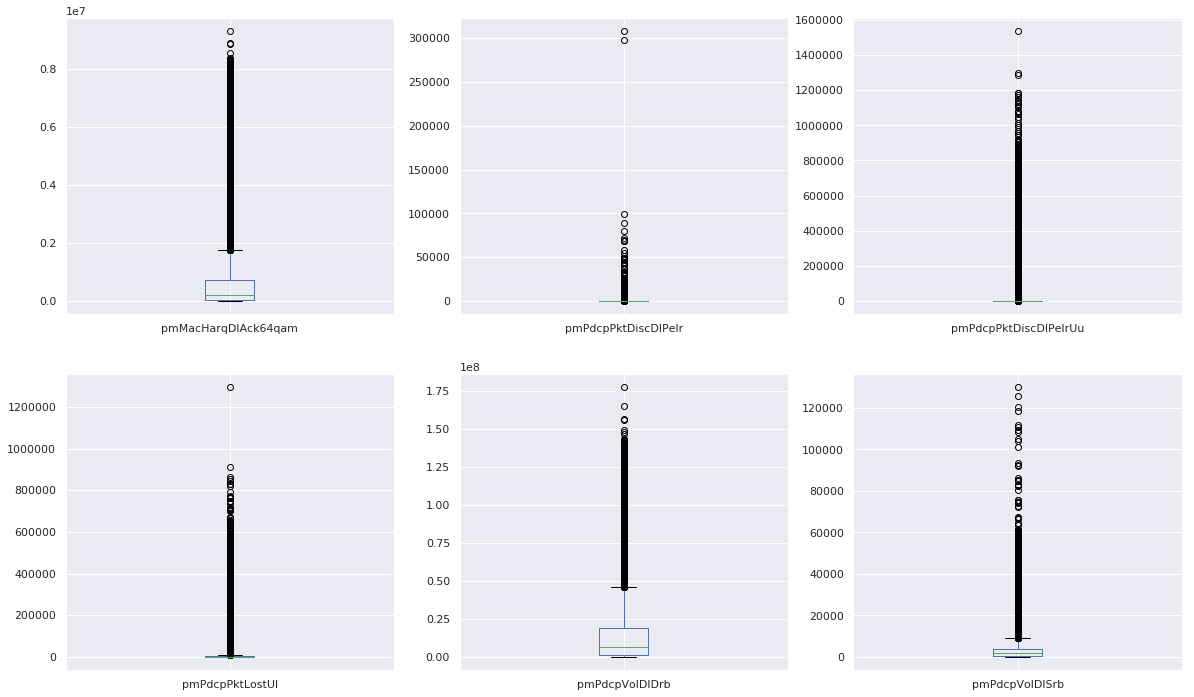

<Figure size 432x288 with 0 Axes>

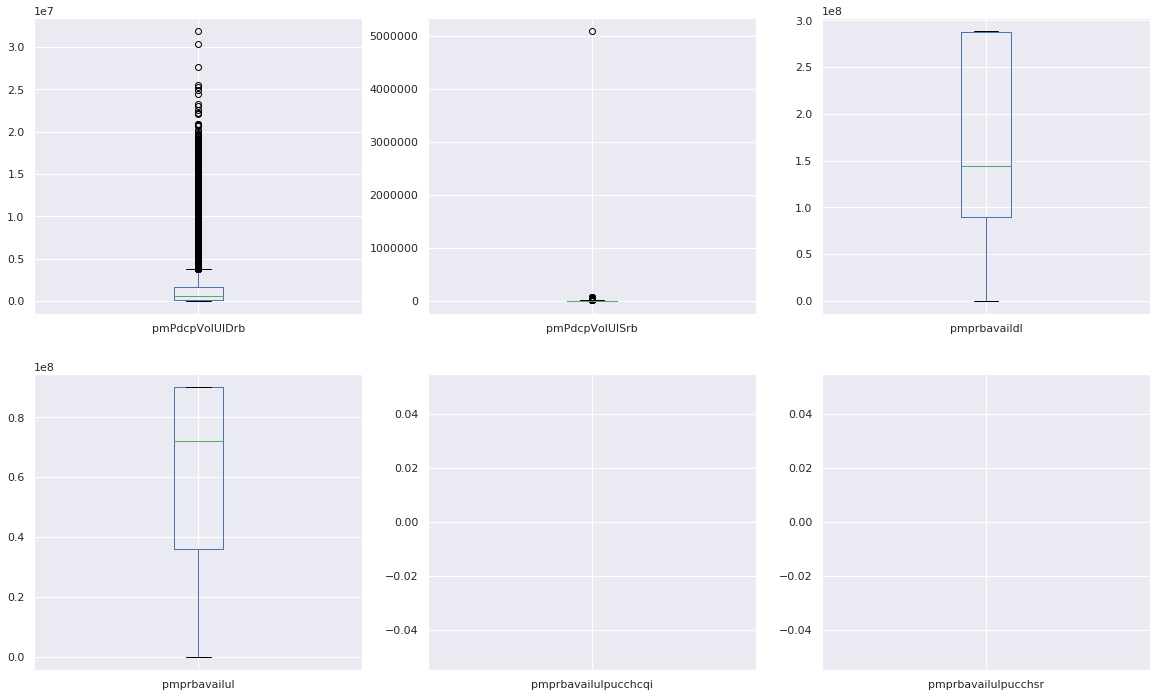

<Figure size 432x288 with 0 Axes>

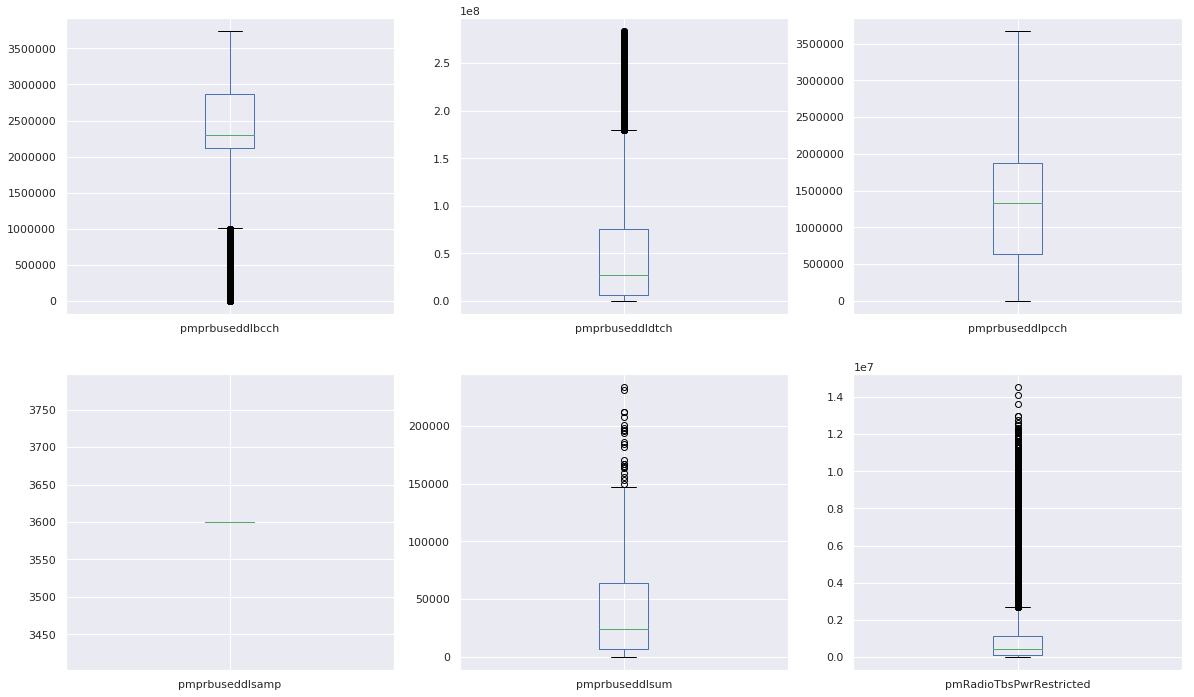

<Figure size 432x288 with 0 Axes>

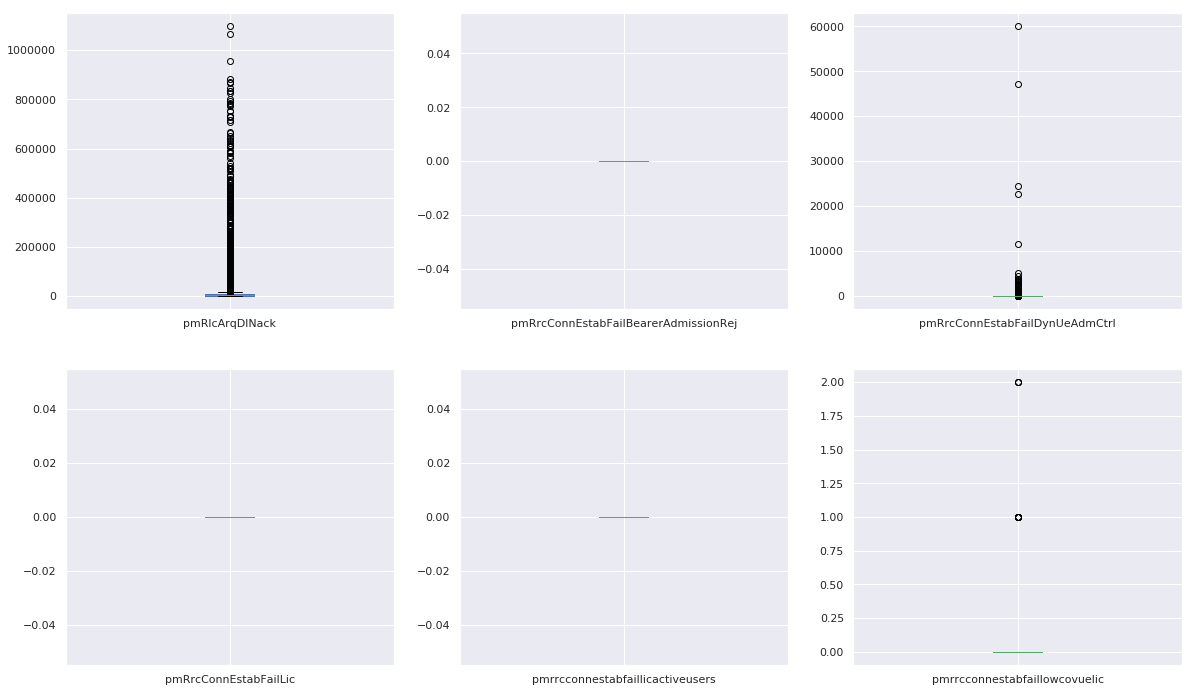

<Figure size 432x288 with 0 Axes>

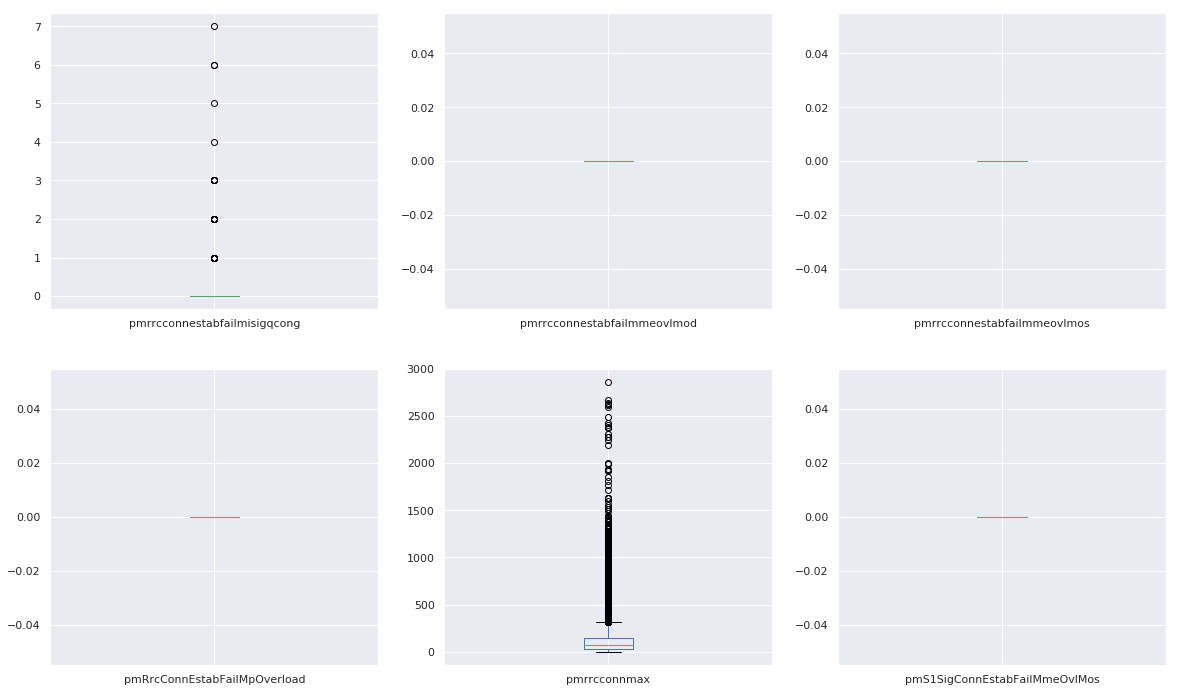

<Figure size 432x288 with 0 Axes>

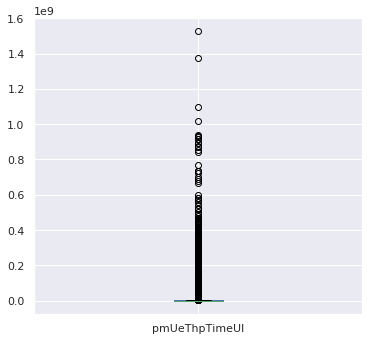

In [0]:
"""# Visualization of columns to show the shape of the distribution, its central value, and its variability
z=1
plt.figure(figsize=(20,12)) 
for column in df:
    if (df[column].dtypes=='int64' or df[column].dtypes=='float64'):
      if z>6:
        z=1
        plt.show()
        plt.clf()
        plt.figure(figsize=(20,12)) 
      plt.subplot(2,3,z)  
      df.boxplot([column])
      z+=1"""

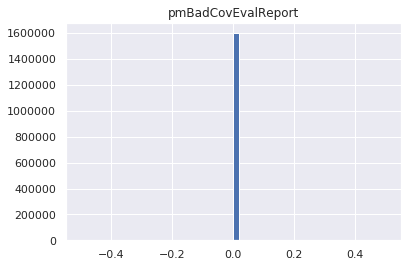

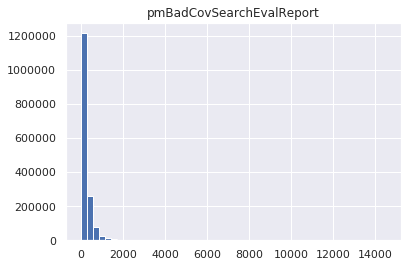

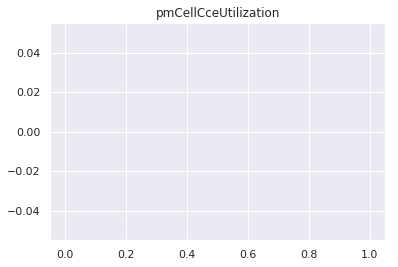

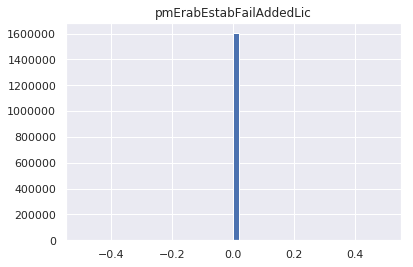

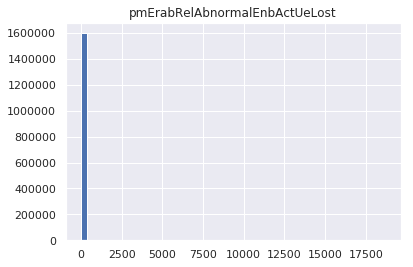

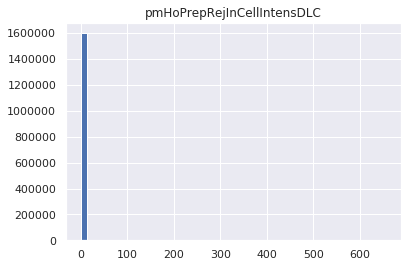

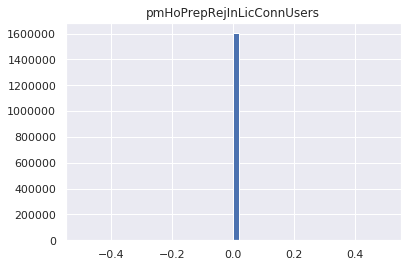

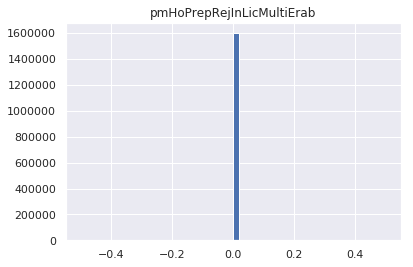

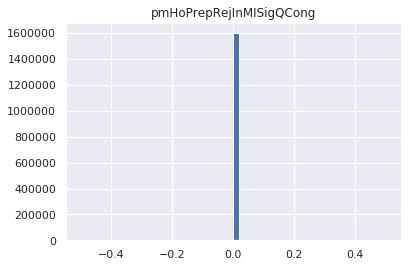

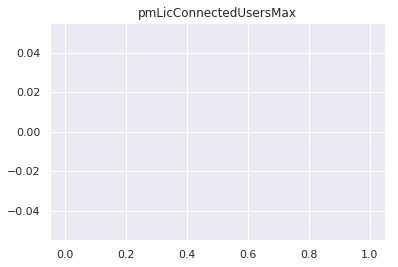

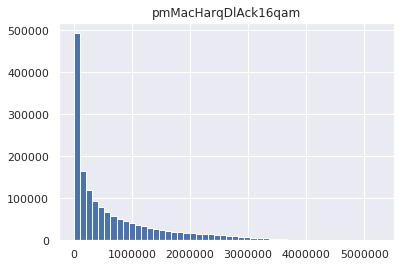

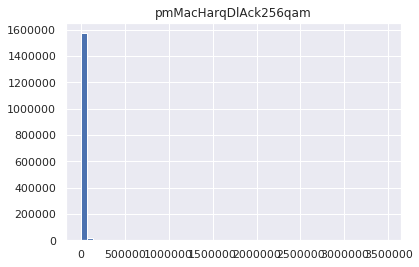

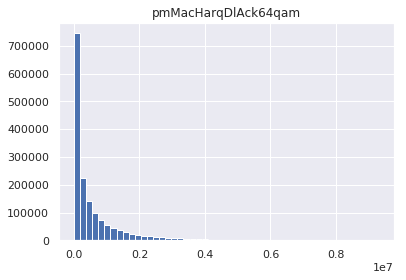

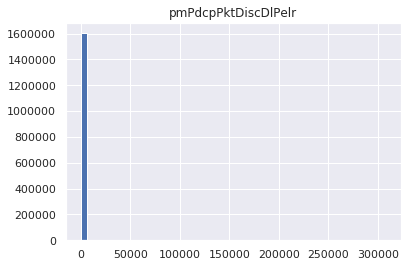

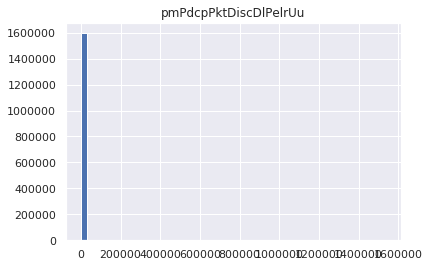

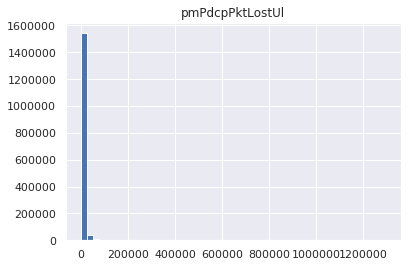

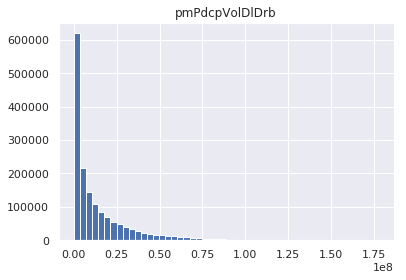

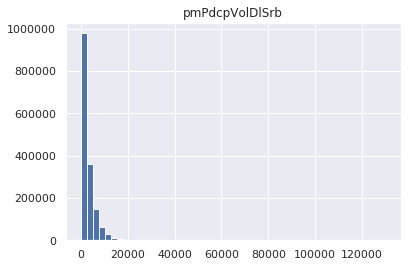

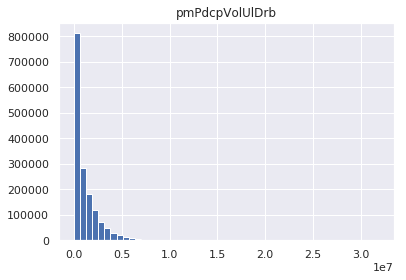

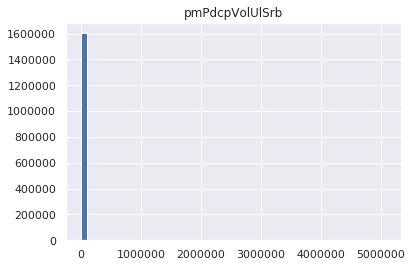

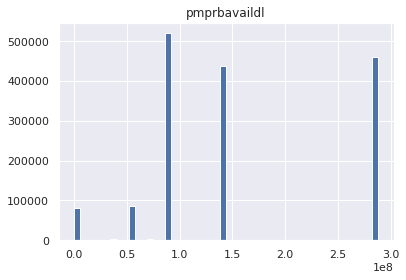

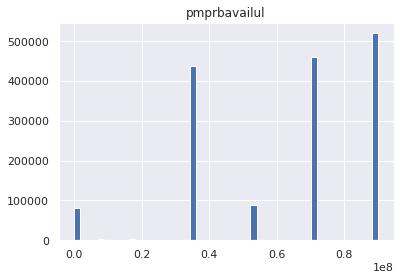

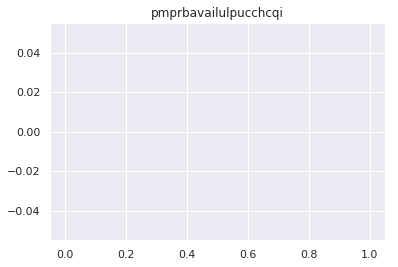

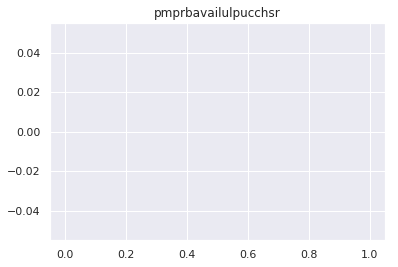

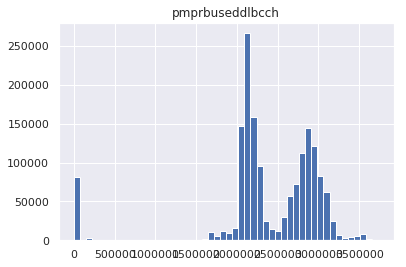

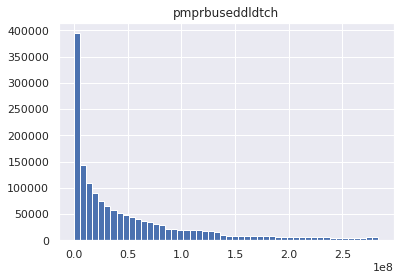

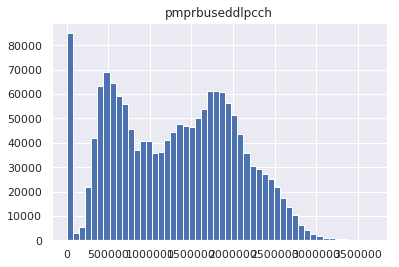

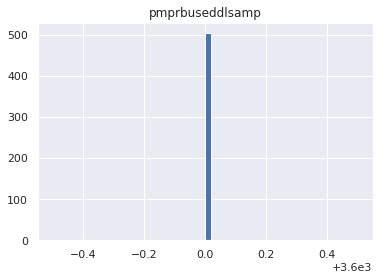

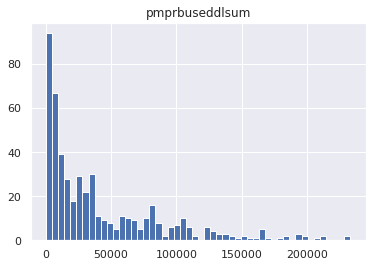

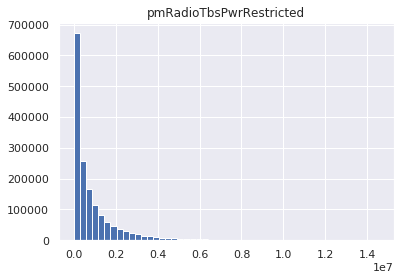

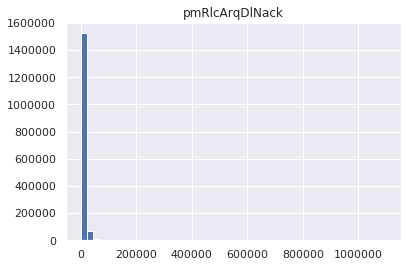

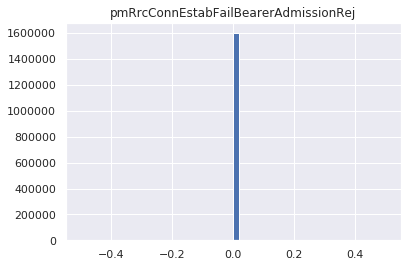

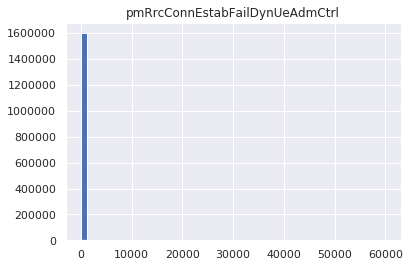

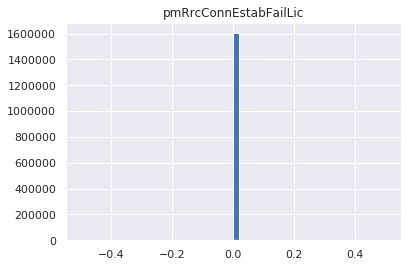

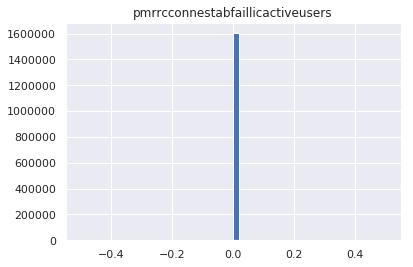

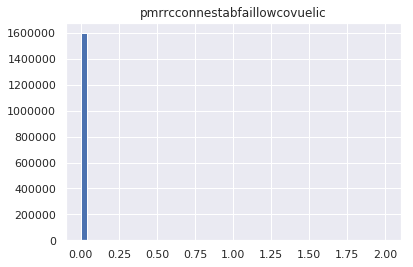

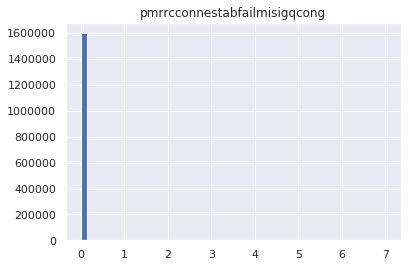

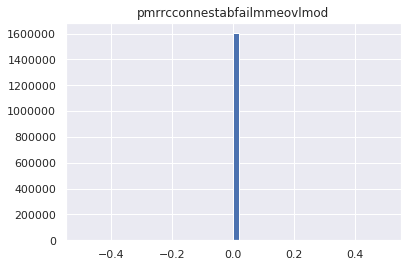

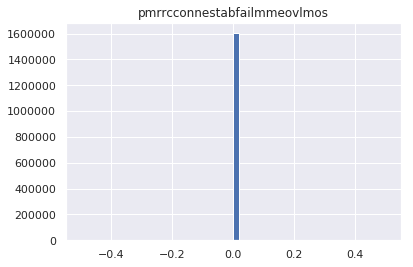

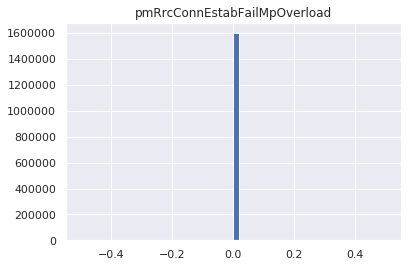

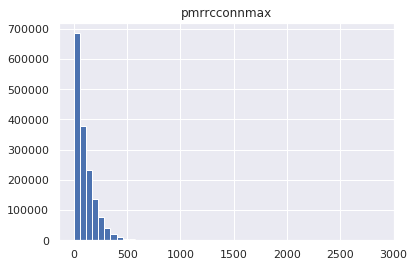

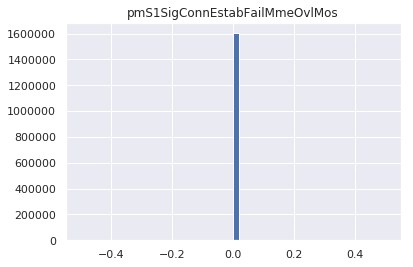

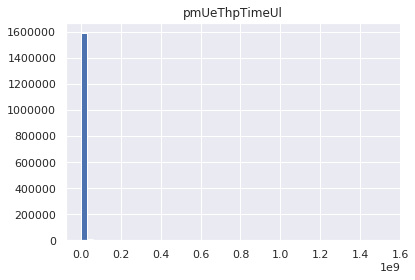

In [0]:
"""# Visualization of distribution of numerical data        
for column in df:
    if (df[column].dtypes=='int64' or df[column].dtypes=='float64'):
      df.hist([column],bins=50)
      plt.show()"""

In [0]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [0]:
df.shape

(1531323, 44)

In [0]:
"""# Drop the rows where all elemennumeric_features are missing
df.dropna(axis=0,how='all',inplace=True)"""

In [0]:
df.shape

(1531323, 44)

In [0]:
# Drop the columns where all elemennumeric_features are missing
df.dropna(axis=1,how='all',inplace=True)

In [0]:
df.shape

(1531323, 40)

In [0]:
# Find the missing values & display the count & percentage of missing data.
for i in df.columns:
    missing_value_count=df[i].isnull().sum()
    missing_value_percent=missing_value_count*100/len(df[i])
    if (missing_value_count>0):
        print(i, "has", missing_value_count, "missing values", "percentage of missing values is", missing_value_percent)
    else:
        print(i, "has no missing values")
    # Treat missing values
    if (df[i].dtypes=='int64' or df[i].dtypes=='float64'):
        if(missing_value_percent<1):
            mean_value=df[i].mean()
            df[i].fillna(mean_value,inplace=True)
        elif(missing_value_percent>1 and missing_value_percent<10):
            mode_value=df[i].mode()[0]
            df[i].fillna(mode_value,inplace=True)
        elif(missing_value_percent>10 and missing_value_percent<50):
           median_value = df[i].median()
           df[i].fillna(median_value,inplace=True)
        elif(missing_value_percent>50 and missing_value_percent<95):
            df[i].fillna(1,inplace=True)
            temp_var=df[i]
            temp_var.where((temp_var==1),other=0,inplace=True)
        elif(missing_value_percent > 95):
            del df[i]
        else:
            print('No treatment needed')
    else:
        if(missing_value_percent<10):
            mode_value=df[i].mode()[0]
            df[i].fillna(mode_value, inplace=True)
        elif(missing_value_percent>10 and missing_value_percent<50):
            df[i].fillna("Missing",inplace=True)
        elif(missing_value_percent>50 and missing_value_percent<95):
            df[i].fillna(0,inplace=True)
            temp_var=df[i]
            temp_var.where((temp_var==0),other=1,inplace=True)
        elif(missing_value_percent>95):
            del df[i]
        else:
            print('No treatment needed')

item has no missing values
pmBadCovEvalReport has 3704 missing values percentage of missing values is 0.24188234618039434
pmBadCovSearchEvalReport has 3704 missing values percentage of missing values is 0.24188234618039434
pmErabEstabFailAddedLic has 38 missing values percentage of missing values is 0.002481514350662793
pmErabRelAbnormalEnbActUeLost has 3704 missing values percentage of missing values is 0.24188234618039434
pmHoPrepRejInCellIntensDLC has 3704 missing values percentage of missing values is 0.24188234618039434
pmHoPrepRejInLicConnUsers has 38 missing values percentage of missing values is 0.002481514350662793
pmHoPrepRejInLicMultiErab has 3704 missing values percentage of missing values is 0.24188234618039434
pmHoPrepRejInMISigQCong has 3704 missing values percentage of missing values is 0.24188234618039434
pmMacHarqDlAck16qam has 3704 missing values percentage of missing values is 0.24188234618039434
pmMacHarqDlAck256qam has 3704 missing values percentage of missing val

In [0]:
# Checking for missing values
df.isnull().sum().sort_values(ascending=False)

pmUeThpTimeUl                           0
pmMacHarqDlAck16qam                     0
pmPdcpVolDlSrb                          0
pmPdcpVolDlDrb                          0
pmPdcpPktLostUl                         0
pmPdcpPktDiscDlPelrUu                   0
pmPdcpPktDiscDlPelr                     0
pmMacHarqDlAck64qam                     0
pmMacHarqDlAck256qam                    0
pmHoPrepRejInMISigQCong                 0
pmS1SigConnEstabFailMmeOvlMos           0
pmHoPrepRejInLicMultiErab               0
pmHoPrepRejInLicConnUsers               0
pmHoPrepRejInCellIntensDLC              0
pmErabRelAbnormalEnbActUeLost           0
pmErabEstabFailAddedLic                 0
pmBadCovSearchEvalReport                0
pmBadCovEvalReport                      0
pmPdcpVolUlDrb                          0
pmPdcpVolUlSrb                          0
pmprbavaildl                            0
pmprbavailul                            0
pmrrcconnmax                            0
pmRrcConnEstabFailMpOverload      

In [0]:
# Selecting numeric variables
numeric=df._get_numeric_data()

In [0]:
numeric.shape

(1531323, 37)

In [0]:
# Selecting categorica variables
categorical=df.select_dtypes(include = ['object'])

In [0]:
categorical.shape

(1531323, 1)

In [0]:
"""Removing Constant Features using Variance Threshold"""

# Importing Required Libraries
from sklearn.feature_selection import VarianceThreshold

# Create a filter for constant features
constant_filter = VarianceThreshold(threshold=0)

# Apply filter to dataset
constant_filter.fit(numeric)

# Get number of non-constant features
len(numeric.columns[constant_filter.get_support()])

25

In [0]:
# Get number of constant features
constant_columns = [column for column in numeric.columns  
                    if column not in numeric.columns[constant_filter.get_support()]]

# Print constant features
for column in constant_columns:  
    print(column)

# Drop the constant variables from dataset
numeric.drop(labels=constant_columns, axis=1, inplace=True)

pmBadCovEvalReport
pmErabEstabFailAddedLic
pmHoPrepRejInLicConnUsers
pmHoPrepRejInLicMultiErab
pmHoPrepRejInMISigQCong
pmRrcConnEstabFailBearerAdmissionRej
pmRrcConnEstabFailLic
pmrrcconnestabfaillicactiveusers
pmrrcconnestabfailmmeovlmod
pmrrcconnestabfailmmeovlmos
pmRrcConnEstabFailMpOverload
pmS1SigConnEstabFailMmeOvlMos


In [0]:
numeric.shape

(1531323, 25)

In [0]:
"""Removing Quasi-Constant Features Using Variance Threshold"""

# Create quasi-constant filter
qconstant_filter = VarianceThreshold(threshold=0.01)

# Apply filter to dataset
qconstant_filter.fit(numeric)

# Check the number of our non-quasi-constant features
len(numeric.columns[qconstant_filter.get_support()])

# Get number of quasi-constant features
qconstant_columns = [column for column in numeric.columns  
                    if column not in numeric.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))

# Print quasi-constant features
for column in qconstant_columns:  
    print(column)

# Drop the quasi-constant variables from dataset
numeric.drop(labels=qconstant_columns, axis=1, inplace=True)

2
pmrrcconnestabfaillowcovuelic
pmrrcconnestabfailmisigqcong


In [0]:
numeric.shape

(1531323, 23)

In [0]:
"""Removing Correlated Features using corr() Method"""

# Create correlation matrix for the columns in the dataset and an empty set that will contain all the correlated features
correlated_features = set()  
correlation_matrix = numeric.corr()

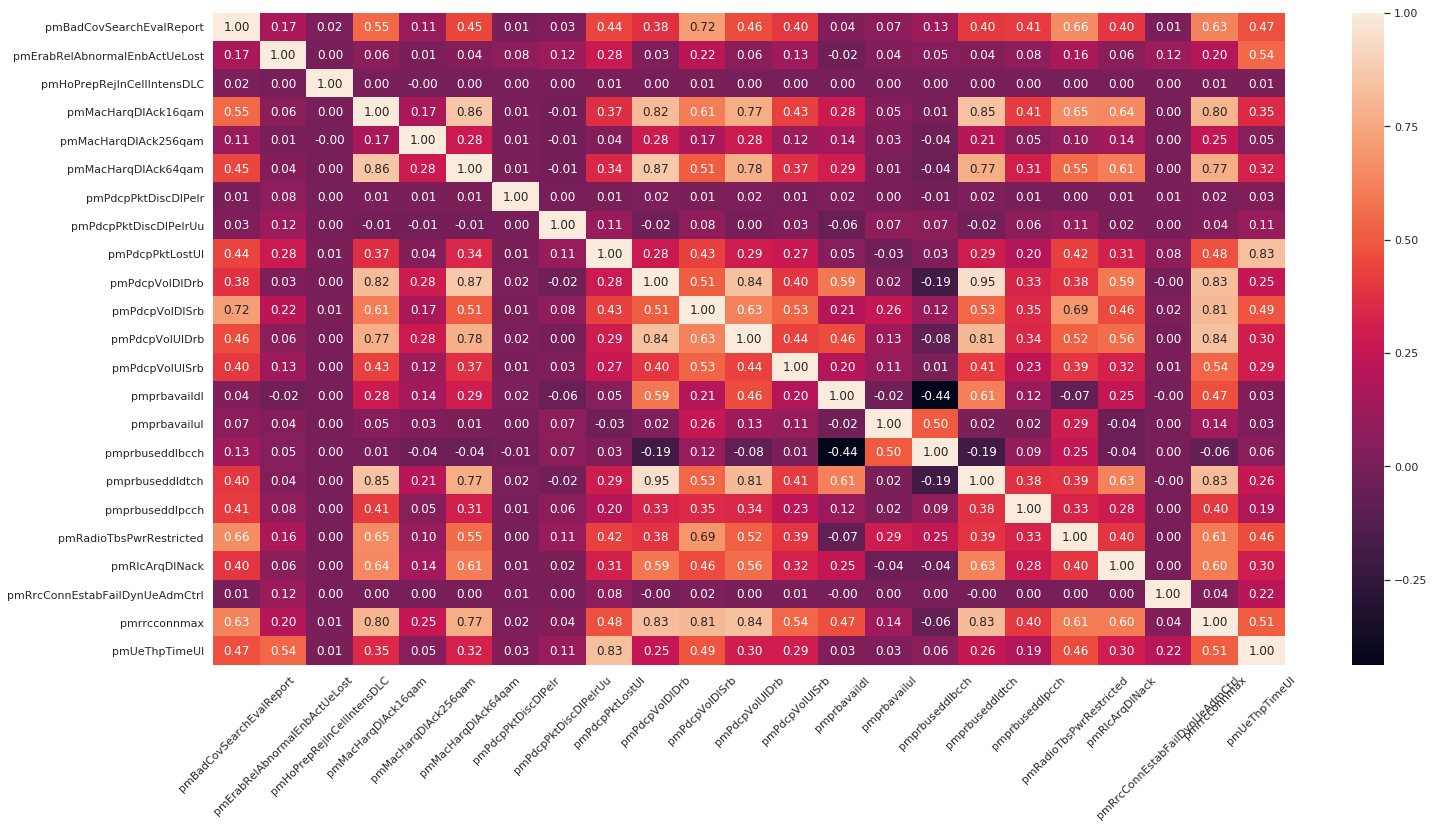

In [0]:
"""# Visualization of correlation using heatmap
f,ax = plt.subplots(figsize=(24,12))
sns.heatmap(correlation_matrix,annot=True,fmt='.2f')
plt.xticks(rotation=45)
plt.show()"""

In [0]:
# Loop through all the columns in the correlation_matrix and add the columns with a correlation value of 0.8 to the correlated_features
for i in range(len(correlation_matrix .columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
# Total number of columns in our dataset, with correlation value of greater than 0.8 with at least 1 other column
len(correlated_features)

# Print names of correlated features
print(correlated_features)

# Remove the correlated columns from the dataset
numeric.drop(labels=correlated_features, axis=1, inplace=True)

{'pmUeThpTimeUl', 'pmPdcpVolDlDrb', 'pmrrcconnmax', 'pmPdcpVolUlDrb', 'pmMacHarqDlAck64qam', 'pmprbuseddldtch'}


In [0]:
numeric.shape

(1531323, 17)

In [0]:
# Visualization of Bi-variate analysis
"""f,ax = plt.subplots(figsize=(77,50))
from pandas.plotting import scatter_matrix
scatter_matrix(numeric)

OR

f,ax = plt.subplots(figsize=(77,50))
sns.pairplot(numeric)
plt.show()"""

'f,ax = plt.subplots(figsize=(77,50))\nfrom pandas.plotting import scatter_matrix\nscatter_matrix(numeric)\n\nOR\n\nf,ax = plt.subplots(figsize=(77,50))\nsns.pairplot(numeric)\nplt.show()'

In [0]:
# Concatenate numeric and categorical features
df=pd.concat([categorical,numeric],axis=1)

In [0]:
df.shape

(1531323, 18)

In [0]:
# Aggregate the data based on cells
X=df.groupby('item').mean().reset_index()

In [0]:
X.shape

(66924, 18)

In [0]:
# Print the column names of X
print(X.columns)

Index(['item', 'pmBadCovSearchEvalReport', 'pmErabRelAbnormalEnbActUeLost',
       'pmHoPrepRejInCellIntensDLC', 'pmMacHarqDlAck16qam',
       'pmMacHarqDlAck256qam', 'pmPdcpPktDiscDlPelr', 'pmPdcpPktDiscDlPelrUu',
       'pmPdcpPktLostUl', 'pmPdcpVolDlSrb', 'pmPdcpVolUlSrb', 'pmprbavaildl',
       'pmprbavailul', 'pmprbuseddlbcch', 'pmprbuseddlpcch',
       'pmRadioTbsPwrRestricted', 'pmRlcArqDlNack',
       'pmRrcConnEstabFailDynUeAdmCtrl'],
      dtype='object')


In [0]:
# List the counters which responsible for Congestion, UL and DL Radio quality, UL and DL volume of the data separatly
con = ["pmHoPrepRejInCellIntensDLC","pmprbavaildl","pmprbavailul","pmprbuseddlbcch","pmprbuseddlpcch","pmRrcConnEstabFailDynUeAdmCtrl"]
qual = ["pmBadCovSearchEvalReport","pmErabRelAbnormalEnbActUeLost","pmMacHarqDlAck16qam","pmMacHarqDlAck256qam","pmPdcpPktDiscDlPelr","pmPdcpPktDiscDlPelrUu","pmPdcpPktLostUl","pmRadioTbsPwrRestricted","pmRlcArqDlNack"]
vol = ["pmPdcpVolDlSrb", "pmPdcpVolUlSrb"]

In [0]:
X_con = [x for x in con if x in X]
X_qual = [x for x in qual if x in X]
X_vol = [x for x in vol if x in X]

In [0]:
# Print the features of Congestion, UL and DL Radio quality, UL and DL volume of the data
print(X_con, X_qual, X_vol)

['pmHoPrepRejInCellIntensDLC', 'pmprbavaildl', 'pmprbavailul', 'pmprbuseddlbcch', 'pmprbuseddlpcch', 'pmRrcConnEstabFailDynUeAdmCtrl'] ['pmBadCovSearchEvalReport', 'pmErabRelAbnormalEnbActUeLost', 'pmMacHarqDlAck16qam', 'pmMacHarqDlAck256qam', 'pmPdcpPktDiscDlPelr', 'pmPdcpPktDiscDlPelrUu', 'pmPdcpPktLostUl', 'pmRadioTbsPwrRestricted', 'pmRlcArqDlNack'] ['pmPdcpVolDlSrb', 'pmPdcpVolUlSrb']


In [0]:
# Dimensionality reduction
from sklearn.decomposition import TruncatedSVD

result = {
    "con": None,
    "qual": None,
    "vol": None
}

for col, val in [("con", X_con), ("qual", X_qual), ("vol", X_vol)]:
    datam = X[val]
    if datam.shape[1] == 1:
        result[col] = datam.values.ravel()
        continue
    svd = TruncatedSVD(n_components=1)
    print("Datam:", datam.shape)
    y = svd.fit_transform(datam)
    result[col] = y.ravel()

Datam: (66924, 6)
Datam: (66924, 9)
Datam: (66924, 2)


In [0]:
# Create dataframe from dictionary
transformed_df = pd.DataFrame.from_dict(result)

In [0]:
transformed_df.head(10)

,con,qual,vol
0,2.714133e+08,2.051857e+06,3633.842981
1,2.714172e+08,1.078099e+06,2678.726205
2,2.701903e+08,8.737549e+05,2052.664437
3,1.135242e+08,2.890558e+06,4817.002923
4,1.135301e+08,2.972035e+06,5489.108659
5,1.135309e+08,9.087227e+05,2655.613733
6,1.351045e+08,1.603891e+06,3841.392589
7,1.351023e+08,1.203775e+06,2815.705799
8,1.350998e+08,6.914244e+05,1788.523515
9,2.702071e+08,1.716756e+05,712.842072


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_df = pd.DataFrame(sc.fit_transform(transformed_df), columns=["con", "qual", "vol"])

In [0]:
Scaled_data=scaled_df.copy()

In [0]:
scaled_df.head(10)

,con,qual,vol
0,1.195878,0.816248,-0.115053
1,1.195923,-0.037437,-0.362585
2,1.181397,-0.216584,-0.524837
3,-0.673668,1.551529,0.191579
4,-0.673598,1.622959,0.365764
5,-0.673589,-0.185928,-0.368574
6,-0.418139,0.423520,-0.061264
7,-0.418165,0.072742,-0.327084
8,-0.418194,-0.376431,-0.593293
9,1.181596,-0.832090,-0.872070


In [0]:
"""# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters = i,init = 'random')
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,7))      
plt.plot(range(1, 31), wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()"""

"# Using the elbow method to find the optimal number of clusters\nfrom sklearn.cluster import KMeans\nwcss = []\nfor i in range(1, 31):\n    kmeans = KMeans(n_clusters = i,init = 'random')\n    kmeans.fit(scaled_df)\n    wcss.append(kmeans.inertia_)\nplt.figure(figsize=(10,7))      \nplt.plot(range(1, 31), wcss,'-o')\nplt.title('The Elbow Method')\nplt.xlabel('Number of clusters')\nplt.ylabel('WCSS')\nplt.show()"

In [0]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 9)
labels = kmeans.fit_predict(scaled_df)

In [0]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=5).fit(scaled_df)

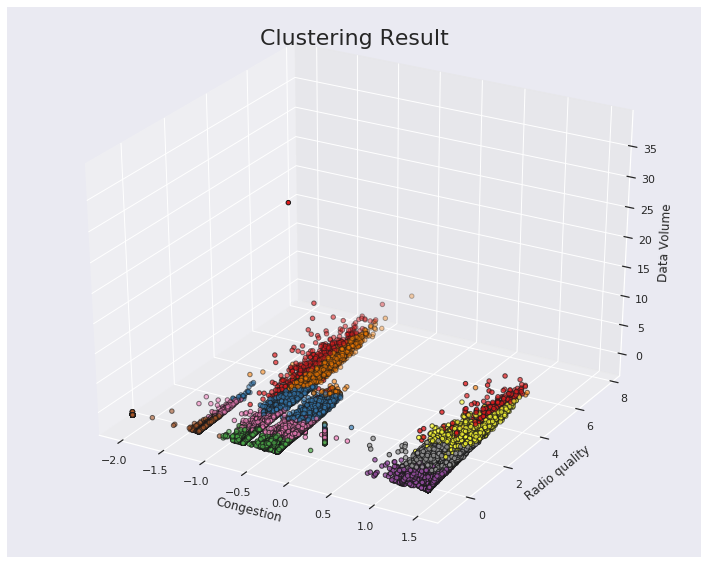

In [0]:
# Create 3D Plot
from mpl_toolkits import mplot3d

# Create 3D axes
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")
cmap = plt.get_cmap("Set1")

ax.scatter3D(scaled_df["con"], scaled_df["qual"], scaled_df["vol"], c=labels, cmap=cmap, edgecolor="k")
ax.set_xlabel("Congestion")
ax.set_ylabel("Radio quality")
ax.set_zlabel("Data Volume")
ax.set_title("Clustering Result", fontsize=22)
plt.tight_layout()

In [0]:
Scaled_data["cells"] = X["item"]
Scaled_data = Scaled_data[["cells", "con", "qual", "vol"]]

In [0]:
Scaled_data.head(10)

,cells,con,qual,vol
0,LD10003A,1.195878,0.816248,-0.115053
1,LD10003B,1.195923,-0.037437,-0.362585
2,LD10003C,1.181397,-0.216584,-0.524837
3,LD10003K,-0.673668,1.551529,0.191579
4,LD10003L,-0.673598,1.622959,0.365764
5,LD10003M,-0.673589,-0.185928,-0.368574
6,LD10003S,-0.418139,0.423520,-0.061264
7,LD10003T,-0.418165,0.072742,-0.327084
8,LD10003U,-0.418194,-0.376431,-0.593293
9,LD10004A,1.181596,-0.832090,-0.872070
